<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-classification/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q polars

In [28]:
# Importando o polars
import polars as pl
# Importando bibliotecas necess√°rias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Base Iris

In [36]:
# Carregando o conjunto de dados Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [37]:
# Dividindo os dados iris em conjunto de treinamento e conjunto de teste
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

In [38]:
# Pr√©-processamento: Padroniza√ß√£o dos dados iris
scaler = StandardScaler()
X_train_scaled_iris = scaler.fit_transform(X_train_iris)
X_test_scaled_iris = scaler.transform(X_test_iris)

In [39]:
# Inicializando o classificador KNN iris
knn_classifier_iris = KNeighborsClassifier()

# Treinando o modelo
knn_classifier_iris.fit(X_train_scaled_iris, y_train_iris)

# Fazendo previs√µes no conjunto de teste
y_pred_iris = knn_classifier_iris.predict(X_test_scaled_iris)

In [40]:
# Avaliando o modelo
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
class_report_iris = classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names)

# Exibindo os resultados
print(f"Accuracy: {accuracy_iris}")
print("Classification Report:")
print(class_report_iris)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Base Shipping

https://www.kaggle.com/datasets/nayanack/shipping

In [9]:
dataset = pl.read_csv('https://raw.githubusercontent.com/Gabriel-Paes/ml-classification/main/dataset/shipping.csv')
dataset

shape: (10_999, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ ID    ‚îÜ Warehouse_ ‚îÜ Mode_of_Sh ‚îÜ Customer_c ‚îÜ ‚Ä¶ ‚îÜ Gender ‚îÜ Discount_o ‚îÜ Weight_in_ ‚îÜ Reached.on ‚îÇ
‚îÇ ---   ‚îÜ block      ‚îÜ ipment     ‚îÜ are_calls  ‚îÜ   ‚îÜ ---    ‚îÜ ffered     ‚îÜ gms        ‚îÜ .Time_Y.N  ‚îÇ
‚îÇ i64   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ str    ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ       ‚îÜ str        ‚îÜ str        ‚îÜ i64        ‚îÜ   ‚îÜ        ‚îÜ i64        ‚îÜ i64        ‚îÜ i64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1     ‚îÜ D          ‚îÜ Flight     ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 44         ‚îÜ 1233       ‚îÜ 1          ‚îÇ
‚îÇ 2     ‚îÜ F          ‚îÜ Flight     ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 59         ‚îÜ 3088       ‚îÜ 1          ‚îÇ
‚îÇ 3     ‚îÜ A          ‚îÜ Flight     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 48         ‚îÜ 3374       ‚îÜ 1          ‚îÇ
‚îÇ 4     ‚îÜ B          ‚îÜ Flight     ‚îÜ 3          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 10         ‚îÜ 1177       ‚îÜ 1          ‚îÇ
‚îÇ ‚Ä¶     ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ 10996 ‚îÜ B          ‚îÜ Ship       ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 6          ‚îÜ 1247       ‚îÜ 0          ‚îÇ
‚îÇ 10997 ‚îÜ C          ‚îÜ Ship       ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 4          ‚îÜ 1155       ‚îÜ 0          ‚îÇ
‚îÇ 10998 ‚îÜ F          ‚îÜ Ship       ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 2          ‚îÜ 1210       ‚îÜ 0          ‚îÇ
‚îÇ 10999 ‚îÜ D          ‚îÜ Ship       ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 6          ‚îÜ 1639       ‚îÜ 0          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [10]:
dataset = dataset.with_columns(pl.col("Warehouse_block").str.replace("F", "E"))

target = 'Reached_on_Time_Y_N'

dataset = dataset.rename({"Reached.on.Time_Y.N": target})
dataset

shape: (10_999, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ ID    ‚îÜ Warehouse_ ‚îÜ Mode_of_Sh ‚îÜ Customer_c ‚îÜ ‚Ä¶ ‚îÜ Gender ‚îÜ Discount_o ‚îÜ Weight_in_ ‚îÜ Reached_on ‚îÇ
‚îÇ ---   ‚îÜ block      ‚îÜ ipment     ‚îÜ are_calls  ‚îÜ   ‚îÜ ---    ‚îÜ ffered     ‚îÜ gms        ‚îÜ _Time_Y_N  ‚îÇ
‚îÇ i64   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ str    ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ       ‚îÜ str        ‚îÜ str        ‚îÜ i64        ‚îÜ   ‚îÜ        ‚îÜ i64        ‚îÜ i64        ‚îÜ i64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1     ‚îÜ D          ‚îÜ Flight     ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 44         ‚îÜ 1233       ‚îÜ 1          ‚îÇ
‚îÇ 2     ‚îÜ E          ‚îÜ Flight     ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 59         ‚îÜ 3088       ‚îÜ 1          ‚îÇ
‚îÇ 3     ‚îÜ A          ‚îÜ Flight     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 48         ‚îÜ 3374       ‚îÜ 1          ‚îÇ
‚îÇ 4     ‚îÜ B          ‚îÜ Flight     ‚îÜ 3          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 10         ‚îÜ 1177       ‚îÜ 1          ‚îÇ
‚îÇ ‚Ä¶     ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ 10996 ‚îÜ B          ‚îÜ Ship       ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 6          ‚îÜ 1247       ‚îÜ 0          ‚îÇ
‚îÇ 10997 ‚îÜ C          ‚îÜ Ship       ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 4          ‚îÜ 1155       ‚îÜ 0          ‚îÇ
‚îÇ 10998 ‚îÜ E          ‚îÜ Ship       ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ M      ‚îÜ 2          ‚îÜ 1210       ‚îÜ 0          ‚îÇ
‚îÇ 10999 ‚îÜ D          ‚îÜ Ship       ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ F      ‚îÜ 6          ‚îÜ 1639       ‚îÜ 0          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [11]:
for column_name in dataset.columns:
    if dataset[column_name].dtype == pl.Utf8:
      print(column_name, dataset[column_name].unique().to_list())

Warehouse_block ['D', 'E', 'A', 'B', 'C']
Mode_of_Shipment ['Road', 'Ship', 'Flight']
Product_importance ['low', 'medium', 'high']
Gender ['F', 'M']


In [12]:
warehouse_block_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
mode_of_shipment_map = {'Ship': 0, 'Flight': 1, 'Road': 2}
product_importance_map = {'low': 0, 'medium': 1, 'high': 2}
gender_map = {'F': 0, 'M': 1}

dataset = dataset.with_columns([
    pl.col('Warehouse_block').replace(warehouse_block_map).alias('Warehouse_block'),
    pl.col('Mode_of_Shipment').replace(mode_of_shipment_map).alias('Mode_of_Shipment'),
    pl.col('Product_importance').replace(product_importance_map).alias('Product_importance'),
    pl.col('Gender').replace(gender_map).alias('Gender')
])

dataset

shape: (10_999, 12)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ ID    ‚îÜ Warehouse_ ‚îÜ Mode_of_Sh ‚îÜ Customer_c ‚îÜ ‚Ä¶ ‚îÜ Gender ‚îÜ Discount_o ‚îÜ Weight_in_ ‚îÜ Reached_on ‚îÇ
‚îÇ ---   ‚îÜ block      ‚îÜ ipment     ‚îÜ are_calls  ‚îÜ   ‚îÜ ---    ‚îÜ ffered     ‚îÜ gms        ‚îÜ _Time_Y_N  ‚îÇ
‚îÇ i64   ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ str    ‚îÜ ---        ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ       ‚îÜ str        ‚îÜ str        ‚îÜ i64        ‚îÜ   ‚îÜ        ‚îÜ i64        ‚îÜ i64        ‚îÜ i64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1     ‚îÜ 3          ‚îÜ 1          ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ 0      ‚îÜ 44         ‚îÜ 1233       ‚îÜ 1          ‚îÇ
‚îÇ 2     ‚îÜ 4          ‚îÜ 1          ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ 1      ‚îÜ 59         ‚îÜ 3088       ‚îÜ 1          ‚îÇ
‚îÇ 3     ‚îÜ 0          ‚îÜ 1          ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 1      ‚îÜ 48         ‚îÜ 3374       ‚îÜ 1          ‚îÇ
‚îÇ 4     ‚îÜ 1          ‚îÜ 1          ‚îÜ 3          ‚îÜ ‚Ä¶ ‚îÜ 1      ‚îÜ 10         ‚îÜ 1177       ‚îÜ 1          ‚îÇ
‚îÇ ‚Ä¶     ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ 10996 ‚îÜ 1          ‚îÜ 0          ‚îÜ 4          ‚îÜ ‚Ä¶ ‚îÜ 0      ‚îÜ 6          ‚îÜ 1247       ‚îÜ 0          ‚îÇ
‚îÇ 10997 ‚îÜ 2          ‚îÜ 0          ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ 0      ‚îÜ 4          ‚îÜ 1155       ‚îÜ 0          ‚îÇ
‚îÇ 10998 ‚îÜ 4          ‚îÜ 0          ‚îÜ 5          ‚îÜ ‚Ä¶ ‚îÜ 1      ‚îÜ 2          ‚îÜ 1210       ‚îÜ 0          ‚îÇ
‚îÇ 10999 ‚îÜ 3          ‚îÜ 0          ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 0      ‚îÜ 6          ‚îÜ 1639       ‚îÜ 0          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [20]:
X = dataset.drop(target)
y = dataset.select(pl.col(target))
y = np.ravel(y)

In [21]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Pr√©-processamento: Padroniza√ß√£o dos dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Inicializando o classificador KNN iris
knn_classifier = KNeighborsClassifier()

# Treinando o modelo
knn_classifier.fit(X_train_scaled, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred = knn_classifier.predict(X_test_scaled)

In [24]:
# Definindo target names
target_names = ['Chegou no prazo', 'N√£o chegou no prazo']

In [25]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

# Exibindo os resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.6475757575757576
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.61      0.58      1312
N√£o chegou no prazo       0.72      0.67      0.70      1988

           accuracy                           0.65      3300
          macro avg       0.64      0.64      0.64      3300
       weighted avg       0.66      0.65      0.65      3300



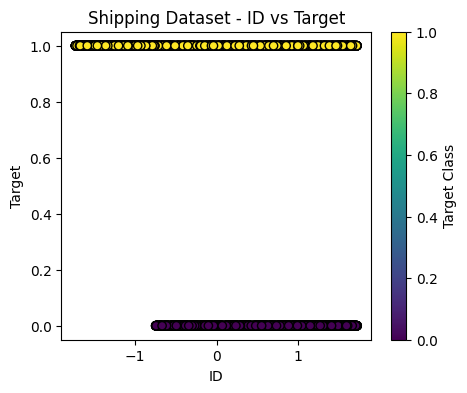

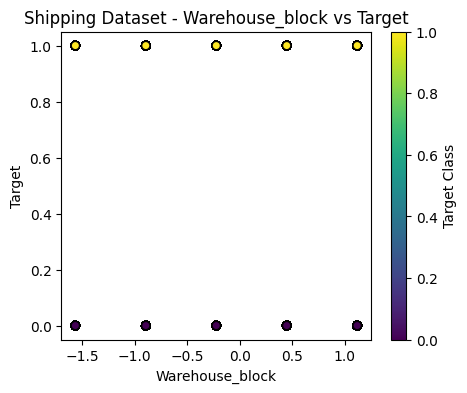

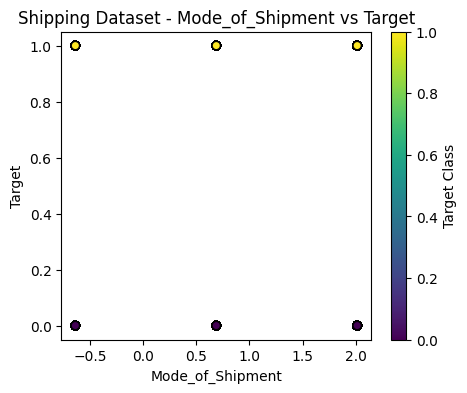

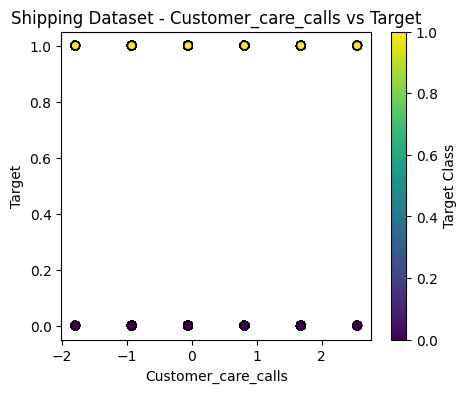

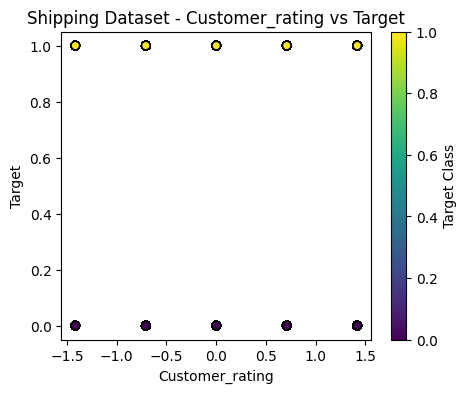

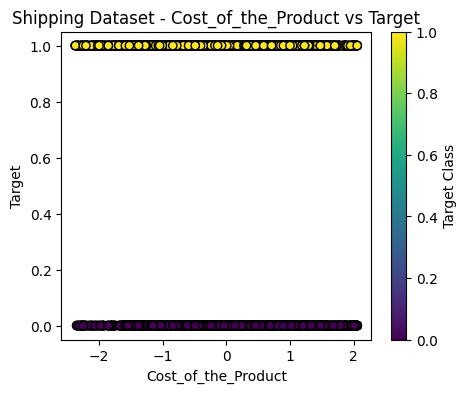

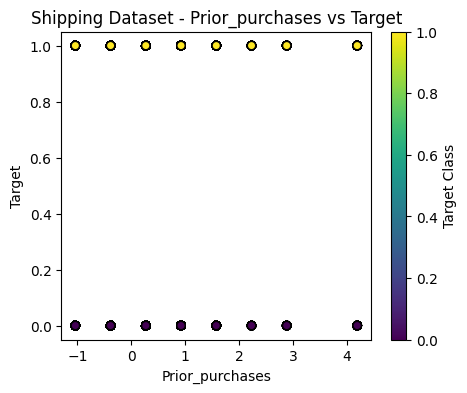

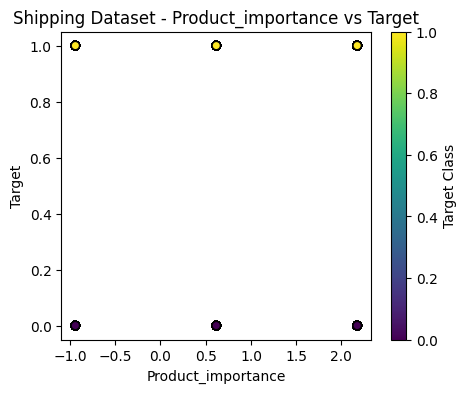

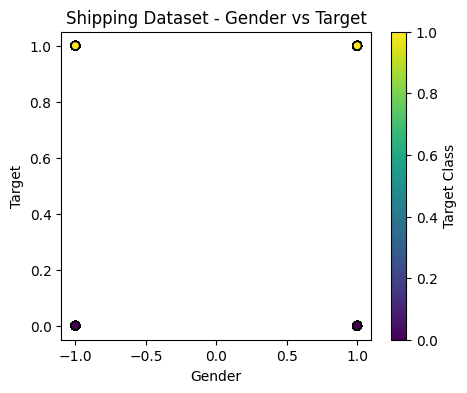

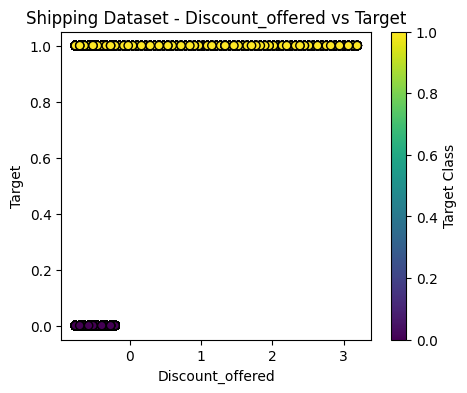

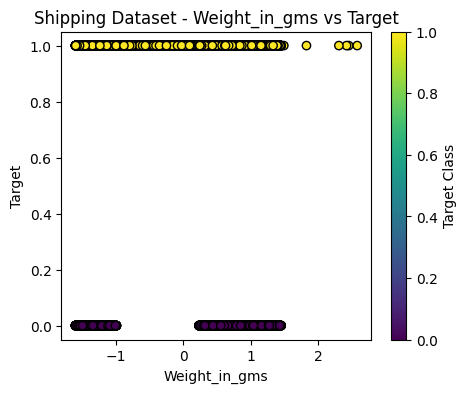

In [27]:
# Plotando gr√°ficos de dispers√£o para as caracter√≠sticas dos dados
for index in range(X_train_scaled.shape[1]):
    plt.figure(figsize=(5, 4))
    plt.scatter(X_train_scaled[:, index], y_train, c=y_train, cmap='viridis', edgecolor='k')
    plt.xlabel(X.columns[index])
    plt.ylabel('Target')
    plt.title(f'Shipping Dataset - {X.columns[index]} vs Target')
    plt.colorbar(label='Target Class')
    plt.show()

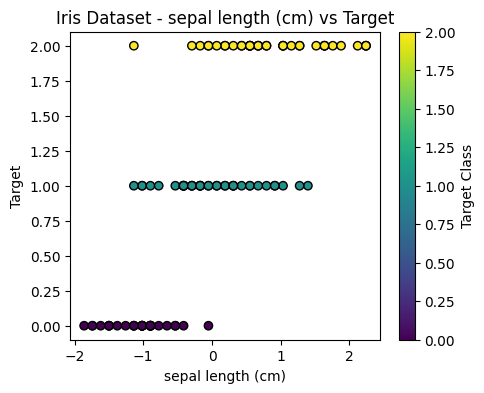

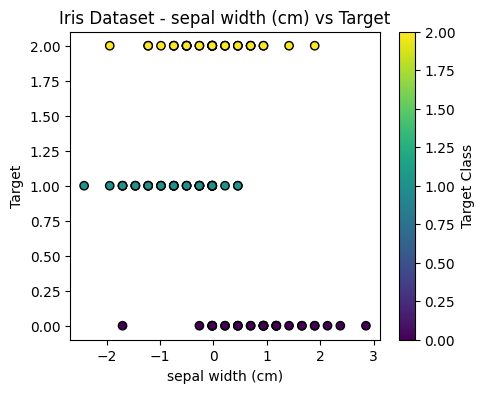

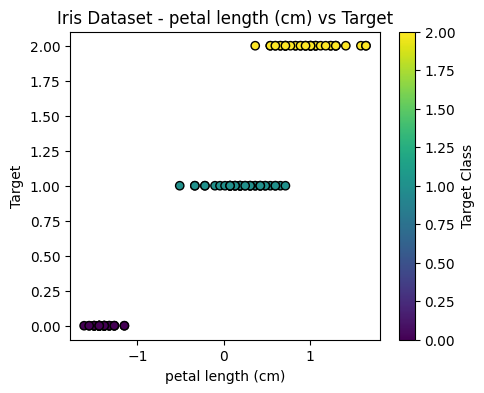

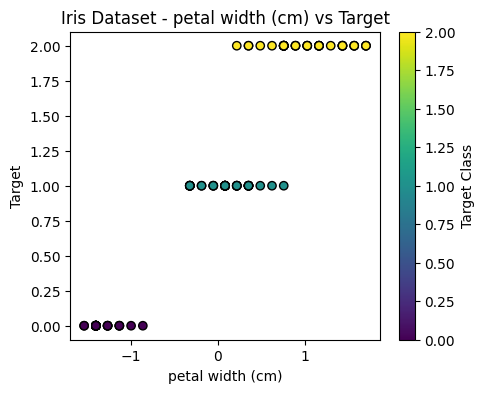

In [43]:
# Plotando gr√°ficos de dispers√£o para as caracter√≠sticas dos dados
for feature_index in range(X_train_scaled_iris.shape[1]):
    plt.figure(figsize=(5, 4))
    plt.scatter(X_train_scaled_iris[:, feature_index], y_train_iris, c=y_train_iris, cmap='viridis', edgecolor='k')
    plt.xlabel(iris.feature_names[feature_index])
    plt.ylabel('Target')
    plt.title(f'Iris Dataset - {iris.feature_names[feature_index]} vs Target')
    plt.colorbar(label='Target Class')
    plt.show()

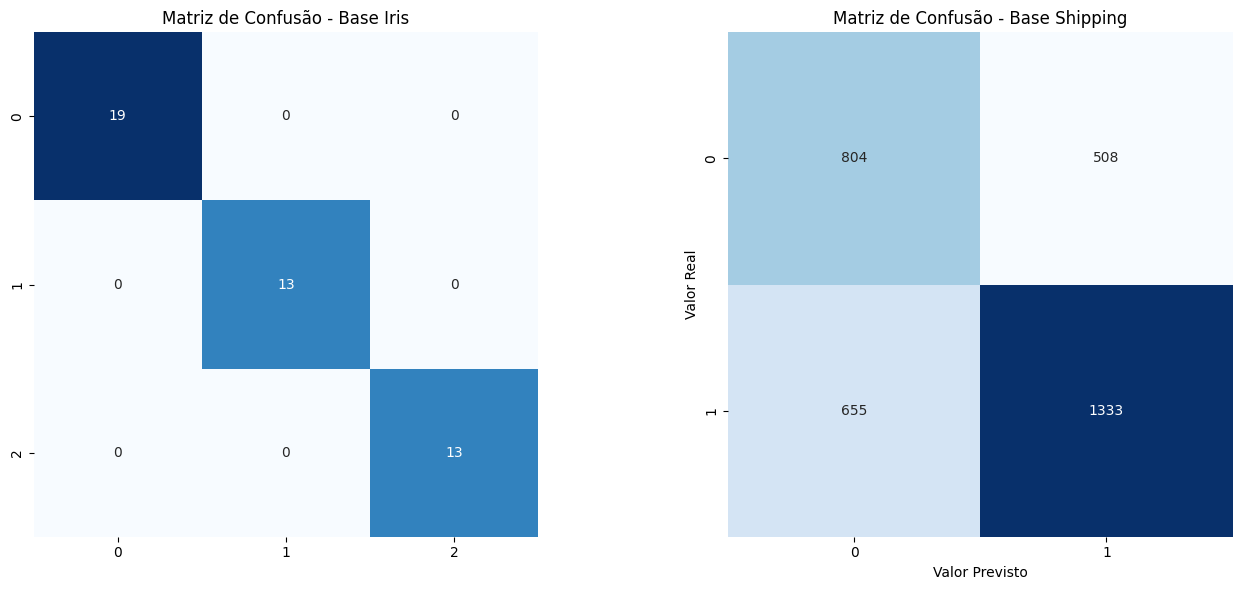

Acur√°cia - Base Iris: 1.0
Acur√°cia - Base Shipping: 0.6475757575757576


In [44]:
# Calculando as matrizes de confus√£o
cm1 = confusion_matrix(y_test_iris, y_pred_iris)
cm2 = confusion_matrix(y_test, y_pred)

# Configura√ß√£o da figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotando a segunda matriz de confus√£o
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axes[1])
axes[0].set_xlabel('Valor Previsto')
axes[0].set_ylabel('Valor Real')
axes[0].set_title('Matriz de Confus√£o - Base Iris')

# Plotando a primeira matriz de confus√£o
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axes[0])
axes[1].set_xlabel('Valor Previsto')
axes[1].set_ylabel('Valor Real')
axes[1].set_title('Matriz de Confus√£o - Base Shipping')

# Exibindo o gr√°fico
plt.tight_layout()
plt.show()

# Exibindo as acur√°cias
print('Acur√°cia - Base Iris:', accuracy_iris)
print('Acur√°cia - Base Shipping:', accuracy)

## Explica√ß√£o das Diferen√ßas e Prov√°veis Motivos:

Em uma conclus√£o geral √© notavel que a base Shipping os resultados n√£o foram t√£o precisos como da base iris mas mudando os valores dos parametros conseguimos melhora um pouco os resultados.

## Testes üß™

### Teste 1

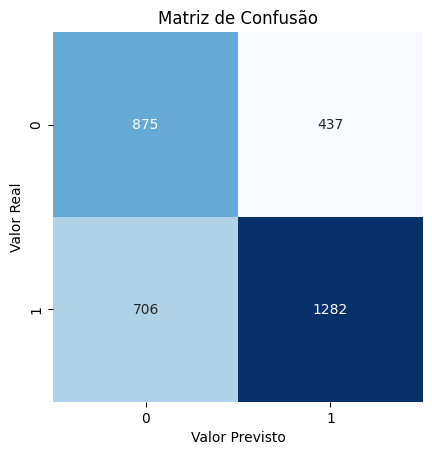

Accuracy: 0.6536363636363637
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.67      0.60      1312
N√£o chegou no prazo       0.75      0.64      0.69      1988

           accuracy                           0.65      3300
          macro avg       0.65      0.66      0.65      3300
       weighted avg       0.67      0.65      0.66      3300



In [49]:
# Inicializando o classificador KNN Teste 1
knn_classifier_test_1 = KNeighborsClassifier(algorithm='auto', n_neighbors=11, p=2, weights='uniform')

# Treinando o modelo
knn_classifier_test_1.fit(X_train_scaled, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred_test_1 = knn_classifier_test_1.predict(X_test_scaled)

# Avaliando o modelo
accuracy_test_1 = accuracy_score(y_test, y_pred_test_1)
class_report_test_1 = classification_report(y_test, y_pred_test_1, target_names=target_names)

# Calculando a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred_test_1)

# Plotando a matriz de confus√£o
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confus√£o')
plt.show()

# Exibindo os resultados
print(f"Accuracy: {accuracy_test_1}")
print("Classification Report:")
print(class_report_test_1)

### Teste 2

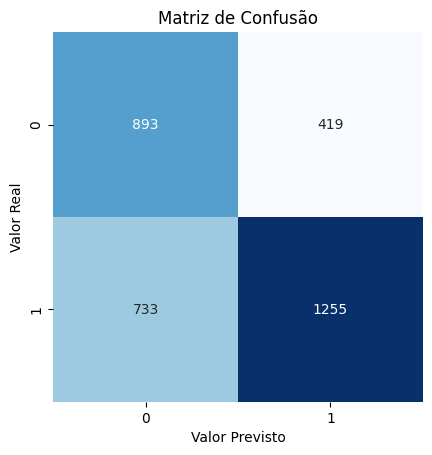

Accuracy: 0.6509090909090909
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.68      0.61      1312
N√£o chegou no prazo       0.75      0.63      0.69      1988

           accuracy                           0.65      3300
          macro avg       0.65      0.66      0.65      3300
       weighted avg       0.67      0.65      0.65      3300



In [54]:
# Inicializando o classificador KNN Teste 2
knn_classifier_test_2 = KNeighborsClassifier(algorithm='brute', n_neighbors=15, p=2, weights='distance')

# Treinando o modelo
knn_classifier_test_2.fit(X_train_scaled, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred_test_2 = knn_classifier_test_2.predict(X_test_scaled)

# Avaliando o modelo
accuracy_test_2 = accuracy_score(y_test, y_pred_test_2)
class_report_test_2 = classification_report(y_test, y_pred_test_2, target_names=target_names)

# Calculando a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred_test_2)

# Plotando a matriz de confus√£o
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confus√£o')
plt.show()

# Exibindo os resultados
print(f"Accuracy: {accuracy_test_2}")
print("Classification Report:")
print(class_report_test_2)